In [1]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Location of the data
city_filepath = os.path.join('Resources', 'city_data.csv')
ride_filepath = os.path.join('Resources', 'ride_data.csv')

In [2]:
city_data = pd.read_csv(city_filepath)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [3]:
ride_data = pd.read_csv(ride_filepath)
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [19]:
all_data = ride_data.merge(city_data, on='city')
all_data['date'] = pd.to_datetime(all_data['date'])
all_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


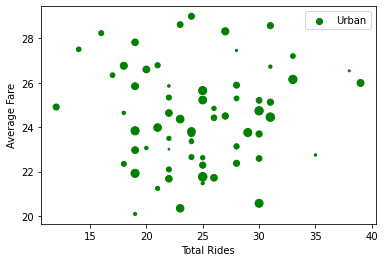

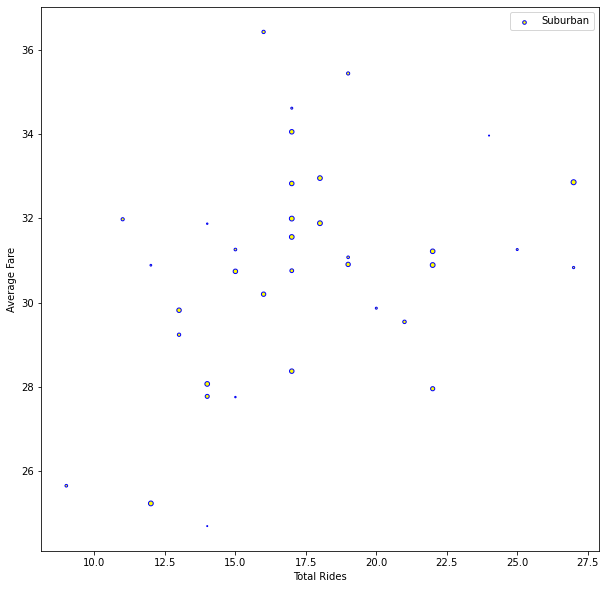

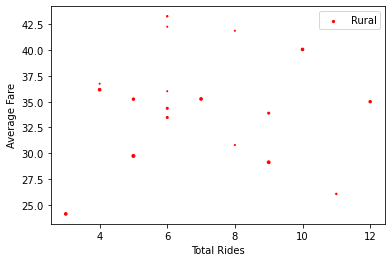

In [84]:
urban_cities_df = all_data[all_data['type'] == "Urban"]
rural_cities_df = all_data[all_data['type'] == "Rural"]
suburban_cities_df = all_data[all_data['type'] == "Suburban"]

suburban_insights_df = pd.DataFrame()
urban_insights_df = pd.DataFrame()
rural_insights_df = pd.DataFrame()

rural_insights_df['Total Rides'] = rural_cities_df.groupby(['city']).count()['ride_id']
rural_insights_df['Total Drivers'] = city_data[city_data['type']=='Rural'].set_index('city')['driver_count']
rural_insights_df['Average Fare'] = rural_cities_df.groupby(['city']).mean()['fare']

urban_insights_df['Total Rides'] = urban_cities_df.groupby(['city']).count()['ride_id']
urban_insights_df['Total Drivers'] = city_data[city_data['type']=='Urban'].set_index('city')['driver_count']
urban_insights_df['Average Fare'] = urban_cities_df.groupby(['city']).mean()['fare']

suburban_insights_df['Total Rides'] = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_insights_df['Total Drivers'] = city_data[city_data['type']=='Suburban'].set_index('city')['driver_count']
suburban_insights_df['Average Fare'] = suburban_cities_df.groupby(['city']).mean()['fare']

urban_insights_df.plot.scatter(x='Total Rides', y='Average Fare', s='Total Drivers', color='green', label="Urban")
suburban_insights_df.plot.scatter(x='Total Rides', y='Average Fare', s='Total Drivers', color='yellow', figsize=(10,10), edgecolor='blue', label="Suburban")
rural_insights_df.plot.scatter(x='Total Rides', y='Average Fare', s='Total Drivers', color='red', label='Rural')
plt.show()

In [63]:
# city type, average fare, total drivers, total rides
region_type_graph = pd.DataFrame()
region_type_graph['Total Rides']= all_data['type'].value_counts() # Total rides by city type
region_type_graph['Total Drivers'] = city_data.groupby(['type']).sum() # Total driver count
region_type_graph['Average Fare'] =  all_data.groupby(['type']).mean()['fare']  # average fare
region_type_graph['Median Fare'] = all_data.groupby(['type']).median()['fare']
# region_type_graph.plot.scatter(x='Total Rides', y='Average Fare', s='Total Drivers', color=['red', 'green', 'blue'], figsize=(8,8))


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [58]:
city_insights_df = pd.DataFrame()
city_insights_df['Total Rides'] = all_data.groupby(['city']).count()['ride_id']
city_insights_df['Total Drivers'] = city_data.set_index('city')['driver_count']
city_insights_df['Type'] = city_data.set_index('city')['type']
city_insights_df

,Total Rides,Total Drivers,Type
city,,,
Amandaburgh,18,12,Urban
Barajasview,22,26,Urban
Barronchester,16,11,Suburban
Bethanyland,18,22,Suburban
Bradshawfurt,10,7,Rural
...,...,...,...
West Robert,31,39,Urban
West Samuelburgh,25,73,Urban
Williamsonville,14,2,Suburban
